# Classification of Faces

In this excercise, we try to classify images of : "Miranda_Cosgrove" "Chris_Martin" "Emma_Stone" "Jamie_Foxx" "Steve_Jobs" "Zac_Efron" "Sandra_Oh" "Taryn_Manning". The data is from a random sample of 8 persons of the OXFORD VGG Face dataset, more information here: http://www.robots.ox.ac.uk/~vgg/data/vgg_face/.

## Downloading of Data

You can download the data using the following code:

In [1]:
import gzip, urllib, os
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
import keras.optimizers as optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras.utils import to_categorical
from keras import regularizers

!pip install h5py
import h5py

keras.__version__

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

'2.3.1'

In [3]:
import importlib, sys

MODULE_PATH = os.path.join(os.getcwd(), "..", "modules")
sys.path.append(MODULE_PATH)

import utils as m_util
importlib.reload(m_util)

<module 'utils' from '/home/jovyan/work/../modules/utils.py'>

In [4]:
# Get path to where datasets are saved
BASE_PATH = os.path.join(os.getcwd(), "..", "datasets")
print("Directory: " + BASE_PATH)
print("Existing Sub-Directories: " + str(os.listdir(BASE_PATH)))

# Directory/File where data is saved in
DS_DIR = os.path.join(BASE_PATH, "8_faces")
FILE_PATH_TRAIN = os.path.join(DS_DIR, "8_faces_train_and_valid.hdf5")

# Load File if not already existent in dataset directory
if not os.path.isfile(FILE_PATH_TRAIN):
    print("Request data")
    os.mkdir(DS_DIR)
    url = "https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1"
    urllib.request.urlretrieve(url, FILE_PATH_TRAIN)
    print("Loaded file")
    
    
print("Files: " + str(os.listdir(DS_DIR)))

Directory: /home/jovyan/work/../datasets
Existing Sub-Directories: ['8_faces', 'MNIST']
Files: ['8_faces_train_and_valid.hdf5', '8_faces_test.hdf5']


In [5]:
# Check values
h5f_X = h5py.File(FILE_PATH_TRAIN, 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'].value
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'].value
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'].value
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'].value
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']


/opt/conda/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


250


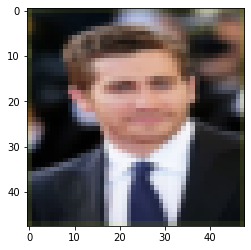

In [6]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
n = 1
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n),(250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0],dtype="uint8"))

In [7]:
FILE_PATH_TEST = os.path.join(DS_DIR, '8_faces_test.hdf5')

#Downloading the data, if it does not exist
if not os.path.isfile(FILE_PATH_TEST):
    print("Load test-files")
    url = "https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1"
    urllib.request.urlretrieve(url, FILE_PATH_TEST)
    print("Test files loaded")

# Check values
h5f_X = h5py.File(FILE_PATH_TEST, 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'].value
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'].value
print(Y_test.shape)

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


In [8]:
np.min(X_train),np.max(X_train),np.min(X_test),np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255

### Playing around with the data

In [9]:
print("Train-Samples: " + str(X_train.shape[0]))
print("X-Training: " + str(X_train.shape))
print("Y-Training: " + str(Y_train.shape))

print("\n------------\nTest-Samples: " + str(X_test.shape[0]))
print("X-Test: " + str(X_test.shape))
print("Y-Test: " + str(Y_test.shape))

Train-Samples: 2000
X-Training: (2000, 48, 48, 3)
Y-Training: (2000,)

------------
Test-Samples: 400
X-Test: (400, 48, 48, 3)
Y-Test: (400,)


## a) Training an CNN from scratch

Train a model (as shown below) from scratch, using the training data for training and the validation data for validation. For all activations in the hidden layer use the 'ReLU', for the last layer use softmax. Use 3x3 convolutions and use padding = same.

- [x] Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy. 
- [x] Calculate the accuracy on the test set (you should reach an accuracy of about 0.54)
- [x] Calculate the confusion matrix
- [x] Have a look at missclassified examples

Image of the network:
https://github.com/ioskn/mldl_htwg/blob/master/uebungen/dl_cnn_faces_net.png

In [10]:
MODEL_PATH = os.path.join(os.getcwd(), "..", "models")

In [11]:
class_labels = {
    0: "Miranda Cosgrove",
    1: "Chris Martin",
    2: "Emma Stone",
    3: "Jamie Foxx",
    4: "Steve Jobs",
    5: "Zac Efron",
    6: "Sandra Oh",
    7: "Taryn Manning"
}

In [12]:
Y_train_encoded = to_categorical(Y_train)
Y_train_encoded.shape

(2000, 8)

In [18]:
Y_test_encoded = to_categorical(Y_test)
Y_test_encoded.shape

(400, 8)

In [13]:
model = Sequential()

# Input layer
model.add(Conv2D(5, (3, 3), input_shape= (48, 48, 3), padding = "same", activation = "relu"))

# Hidden layers
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(15, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D((5,5)))
model.add(Conv2D(20, (3, 3), padding = "same", activation = "relu"))

# Output-layer
model.add(Flatten())
model.add(Dense(len(class_labels.keys()), input_shape=(8,), activation = "softmax",  activity_regularizer = regularizers.l2(.01)))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 5)         140       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 15)        690       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 15)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 20)          2720      
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)               

In [14]:
MODEL_NAME_1 = "conv_from_scratch.json"

# Compile & train model
optim = optimizers.SGD(learning_rate = .05, momentum = .95)
model.compile(optimizer = optim, loss = "categorical_crossentropy", metrics = ["acc"])

# model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["acc"])
history = model.fit(X_train, Y_train_encoded, epochs = 40, batch_size = 250)


Epoch 1/40
2000/2000 [==============================] - 3s 1ms/step - loss: 2.4006 - acc: 0.1170
Epoch 2/40
2000/2000 [==============================] - 1s 543us/step - loss: 2.3883 - acc: 0.1445
Epoch 3/40
2000/2000 [==============================] - 1s 544us/step - loss: 2.3781 - acc: 0.2310
Epoch 4/40
2000/2000 [==============================] - 1s 545us/step - loss: 2.3577 - acc: 0.2140
Epoch 5/40
2000/2000 [==============================] - 1s 610us/step - loss: 2.3181 - acc: 0.2655
Epoch 6/40
2000/2000 [==============================] - 1s 606us/step - loss: 2.2557 - acc: 0.3115
Epoch 7/40
2000/2000 [==============================] - 1s 578us/step - loss: 2.2042 - acc: 0.3290
Epoch 8/40
2000/2000 [==============================] - 1s 565us/step - loss: 2.1682 - acc: 0.3935
Epoch 9/40
2000/2000 [==============================] - 1s 648us/step - loss: 2.1680 - acc: 0.3830
Epoch 10/40
2000/2000 [==============================] - 1s 629us/step - loss: 2.1214 - acc: 0.4175
Epoch 11/4

In [52]:
def update_model(model, model_name, x = X_test, y = Y_test_encoded):
    
    """
        Compare two trained models and persist/keep the one that performs better on some test set.
    """
    
    model_n = os.path.join(MODEL_PATH, model_name)
    
    # Compare model if one already exists
    if m_util.model_exists(model_n):
        print("Compare models [current <> previous]")
        prev_model = m_util.import_model(model_n)
        prev_model.compile(loss = model.loss, optimizer = model.optimizer, metrics = ["acc"])
        
        if m_util.compare(prev_model, model, x, y) == 1:
            print("New Model is better, update")
            m_util.export_model(model, model_n)
        return
    
    # Currently no such model, write instantly
    print("Nothing to compare to, write model")
    m_util.export_model(model, model_n)

In [28]:
# update model if currently trained model performs better on test-set
update_model(model, MODEL_NAME_1)

Compare models [current <> previous]
Model loaded
Parameters loaded
400/400 [==============================] - 0s 637us/step


In [29]:
model.evaluate(X_test, Y_test_encoded)

400/400 [==============================] - 0s 528us/step


[1.5066168785095215, 0.5400000214576721]

In [30]:
def print_learning_curves(history):
    fig = plt.figure(figsize = (20,8))
    plt.subplot(121)
    plt.title("Accuracy")
    plt.plot(history.history["acc"])
    plt.subplot(122)
    plt.title("Loss")
    plt.plot(history.history["loss"])

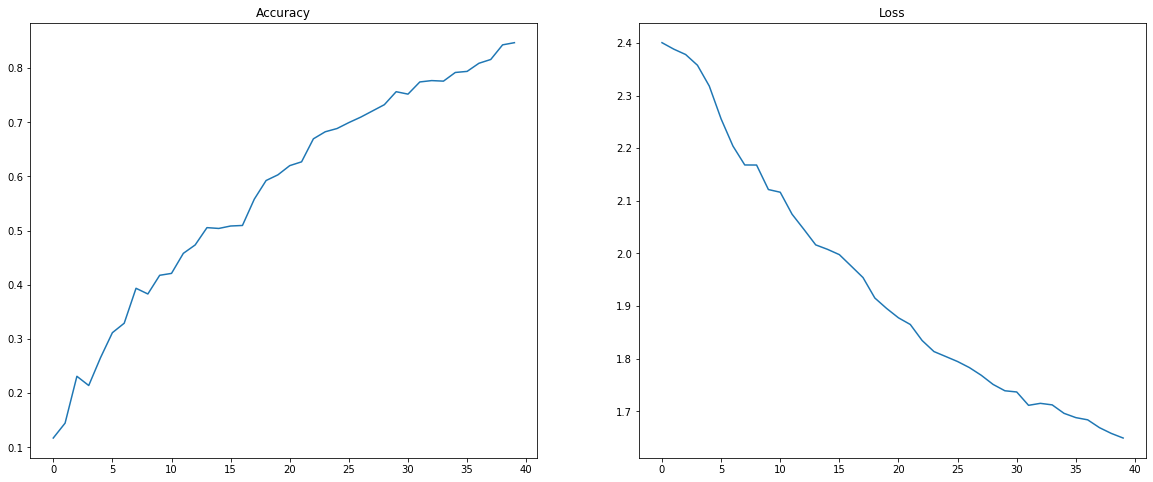

In [31]:
print_learning_curves(history)

In [32]:
y_pred = model.predict(X_test)
y_pred

array([[0.04514581, 0.4381891 , 0.01792078, ..., 0.17901003, 0.0161938 ,
        0.22267087],
       [0.01256172, 0.03852398, 0.04877497, ..., 0.07393593, 0.04796431,
        0.08660282],
       [0.0209709 , 0.05900613, 0.19805652, ..., 0.0800134 , 0.05917894,
        0.39006582],
       ...,
       [0.00910651, 0.709126  , 0.01953004, ..., 0.14034587, 0.02111728,
        0.06096011],
       [0.30639556, 0.08932295, 0.09627528, ..., 0.11650039, 0.02852869,
        0.2606302 ],
       [0.41863006, 0.08161274, 0.04147014, ..., 0.02988396, 0.16778857,
        0.2227997 ]], dtype=float32)

In [33]:
pred_lable_indices = np.argmax(y_pred, axis = 1)
print(pred_lable_indices.shape)
print(Y_test.shape)

(400,)
(400,)


In [34]:
def show_confusion(y_predicted, y_true):
    con_mat = confusion_matrix(y_predicted, y_true)
    plt.figure(figsize = (8, 6))
    ax = sns.heatmap(con_mat, annot = True, cmap = plt.cm.Blues)
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + .5, top - .5)
    plt.show()
    plt.tight_layout()

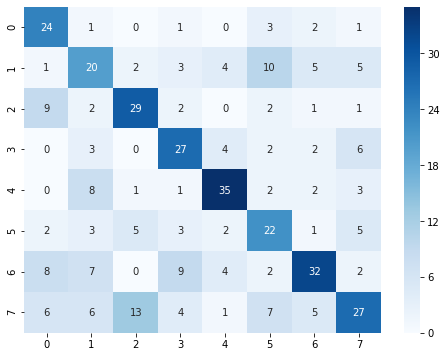

<Figure size 432x288 with 0 Axes>

In [35]:
show_confusion(pred_lable_indices, Y_test)

In [36]:
def plot_imgs(imgs, max_per_row = 4):
    """
        Prints array of images.
    """
    
    sample_count = imgs.shape[0]
    
    fig = plt.figure(figsize = (20,20))
    
    columns = max_per_row if isinstance(max_per_row, int) else 4
    rows = sample_count
    
    for i in range(sample_count):
        plt.subplot(rows,columns,i+1)
        plt.imshow(imgs[i])
    

In [37]:
def show_wrong_classified(x, y_pred, y_true):
    """
        Select and show random wrong classified images.
    """
    
    mis_classified = np.where(y_pred != y_true)[0]
    
    random_mis_cl_indx = np.random.choice(len(mis_classified), 10)
    mis_img = X_test[random_mis_cl_indx]
    
    plot_imgs(mis_img)

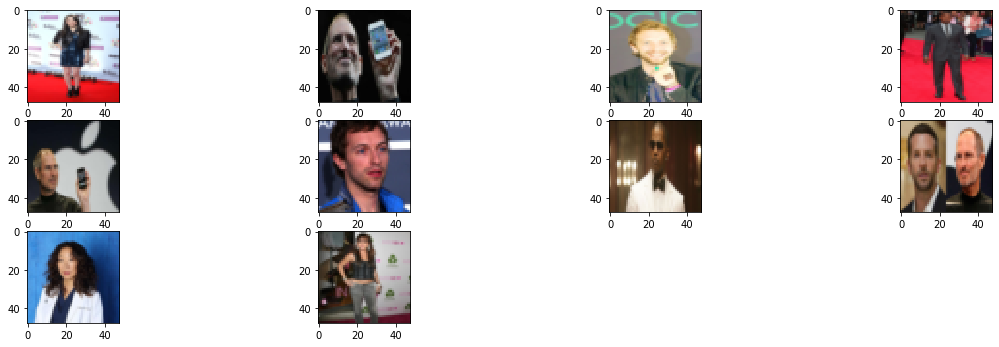

In [38]:
show_wrong_classified(X_train, pred_lable_indices, Y_test)

## b) Training using transfer learning
In transfer learning you use an existing trained model with given weights trained on a different task. You then add a few layers yourself and only train them. The model you add should look like:

```
my_dense1 (Dense)            (None, 512)               262656    
_________________________________________________________________
my_dense2 (Dense)            (None, 512)               262656    
_________________________________________________________________
my_dense3 (Dense)            (None, 100)               51300     
_________________________________________________________________
my_dense4 (Dense)            (None, 8)                 808       
```

Use the following code as a starting point:

In [39]:
from keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False,input_shape = (img_width, img_height, 3))

In [43]:
MODEL_NAME_2 = "VGGA12_CP.json"
fc1 = base_model.output
fc1 = Flatten()(fc1)

fc1 = Dense(512, activation = "relu", name = "my_dense1")(fc1)
fc1 = Dense(512, activation = "relu", name = "my_dense2")(fc1)
fc1 = Dense(100, activation = "relu", name = "my_dense3")(fc1)

fc1 = Dense(8,activation='softmax', name='my_dense4')(fc1)
model_trans = keras.Model(base_model.input, fc1) #Current hack for TF 2.0 and keras
model_trans.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [44]:
for layer in model_trans.layers:
  name = layer.name
  if name.startswith('my'):
    layer.trainable = True
    print(name)
  else:
    layer.trainable = False

my_dense1
my_dense2
my_dense3
my_dense4


In [45]:
model_trans.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["acc"])
history = model_trans.fit(X_train, Y_train_encoded, epochs = 10, batch_size = 25)

Epoch 1/10
2000/2000 [==============================] - 34s 17ms/step - loss: 2.0164 - acc: 0.2305
Epoch 2/10
2000/2000 [==============================] - 33s 17ms/step - loss: 1.8633 - acc: 0.3485
Epoch 3/10
2000/2000 [==============================] - 35s 17ms/step - loss: 1.7277 - acc: 0.3965
Epoch 4/10
2000/2000 [==============================] - 35s 17ms/step - loss: 1.6245 - acc: 0.4185
Epoch 5/10
2000/2000 [==============================] - 36s 18ms/step - loss: 1.5404 - acc: 0.4590
Epoch 6/10
2000/2000 [==============================] - 35s 17ms/step - loss: 1.4805 - acc: 0.4735
Epoch 7/10
2000/2000 [==============================] - 35s 18ms/step - loss: 1.4180 - acc: 0.5000
Epoch 8/10
2000/2000 [==============================] - 37s 18ms/step - loss: 1.3587 - acc: 0.5195
Epoch 9/10
2000/2000 [==============================] - 35s 17ms/step - loss: 1.3238 - acc: 0.5365
Epoch 10/10
2000/2000 [==============================] - 37s 19ms/step - loss: 1.2789 - acc: 0.5375


In [47]:
model_trans.evaluate(X_test, Y_test_encoded)

400/400 [==============================] - 5s 13ms/step


[1.3113997411727905, 0.5024999976158142]

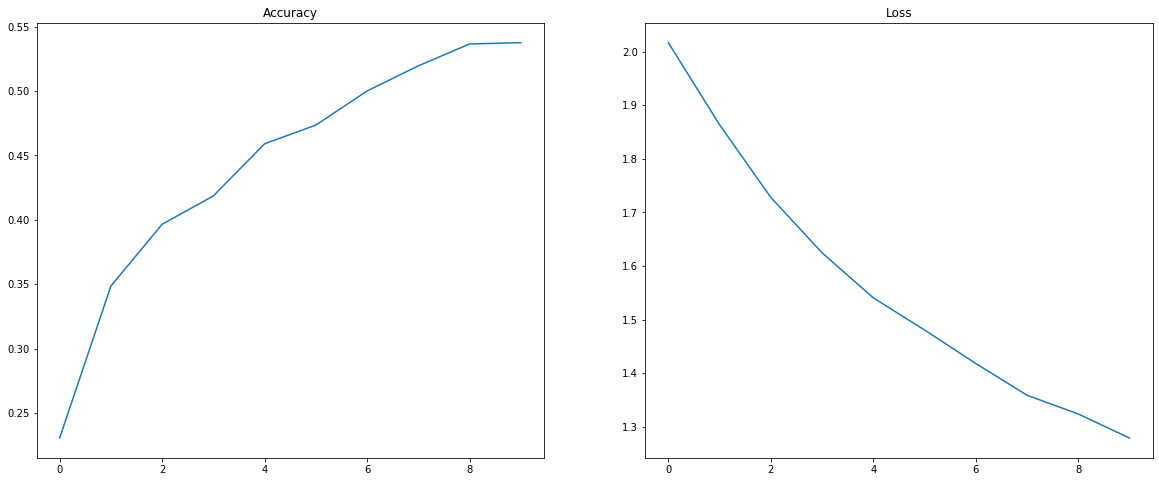

In [48]:
print_learning_curves(history)

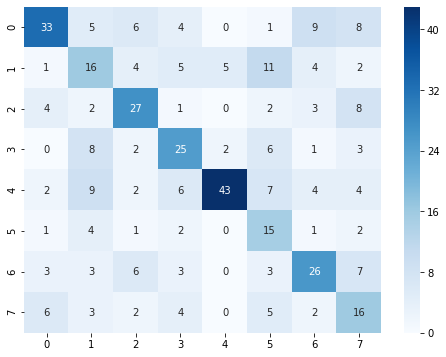

<Figure size 432x288 with 0 Axes>

In [49]:
y_pred = np.argmax(model_trans.predict(X_test), axis = 1)
show_confusion(y_pred, Y_test)

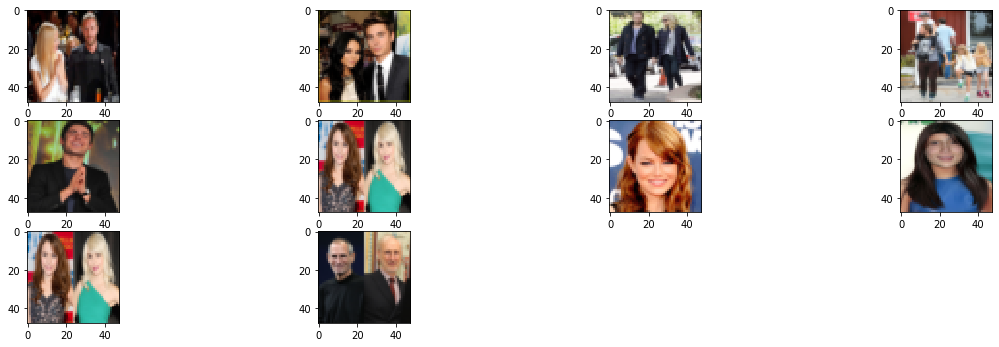

In [50]:
show_wrong_classified(X_test, y_pred, Y_test)

In [53]:
update_model(model_trans, MODEL_NAME_2)

Compare models [current <> previous]
Model loaded
Parameters loaded
400/400 [==============================] - 5s 12ms/step
New Model is better, update
Model written into json.
Weights written into file.


Do the same analysis as in a) above. You should get an accuracy of approx 0.61

## c) Try to get better.

Ideas: use dropout and other tricks to prevent overfitting. Try to learn some convulutional layers as well.

In [61]:
MODEL_NAME_3 = "VGGA16_extende.json"

fc1 = base_model.output
fc1 = Flatten()(fc1)

fc1 = Dense(4096, activation = "relu", name = "my_dense1")(fc1)

fc1 = Dropout(0.5)(fc1)
fc1 = Dense(4096, activation = "relu", name = "my_dense3")(fc1)

# fc1 = Reshape((100, 1))(fc1)
# fc1 = Conv1D(10, (5), activation = "relu", name = "my_cnv1")(fc1)
# fc1 = Flatten()(fc1)

fc1 = Dropout(0.5)(fc1)
fc1 = Dense(50, activation = "relu", name = "my_dense4")(fc1)

# fc1 = Conv1D(10, (5))(fc1)

fc1 = Dense(8, activation='softmax', name='my_dense8x')(fc1)
trans_model = keras.Model(base_model.input, fc1) #Current hack for TF 2.0 and keras
trans_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [62]:
for layer in trans_model.layers:
    name = layer.name
    if name.startswith("my"):
        layer.trainable = True
        print(name)
    else:
        layer.trainable = False

my_dense1
my_dense3
my_dense4
my_dense8x


In [64]:
# optim = optimizers.SGD(lr = .08, momentum = 0.9)
trans_model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["acc"])
history = trans_model.fit(X_train, Y_train_encoded, epochs = 30, batch_size = 25)

Epoch 1/30
2000/2000 [==============================] - 36s 18ms/step - loss: 2.0514 - acc: 0.1800
Epoch 2/30
2000/2000 [==============================] - 40s 20ms/step - loss: 1.9358 - acc: 0.2750
Epoch 3/30
2000/2000 [==============================] - 41s 21ms/step - loss: 1.8243 - acc: 0.3325
Epoch 4/30
2000/2000 [==============================] - 39s 19ms/step - loss: 1.7318 - acc: 0.3545
Epoch 5/30
2000/2000 [==============================] - 41s 21ms/step - loss: 1.6520 - acc: 0.4060
Epoch 6/30
2000/2000 [==============================] - 38s 19ms/step - loss: 1.6101 - acc: 0.4065
Epoch 7/30
2000/2000 [==============================] - 40s 20ms/step - loss: 1.5393 - acc: 0.4550
Epoch 8/30
2000/2000 [==============================] - 40s 20ms/step - loss: 1.5030 - acc: 0.4665
Epoch 9/30
2000/2000 [==============================] - 43s 21ms/step - loss: 1.4453 - acc: 0.4720
Epoch 10/30
2000/2000 [==============================] - 49s 24ms/step - loss: 1.4221 - acc: 0.4895
Epoch 11/

In [65]:
trans_model.evaluate(X_test, Y_test_encoded)

400/400 [==============================] - 6s 15ms/step


[1.1230588102340697, 0.6000000238418579]

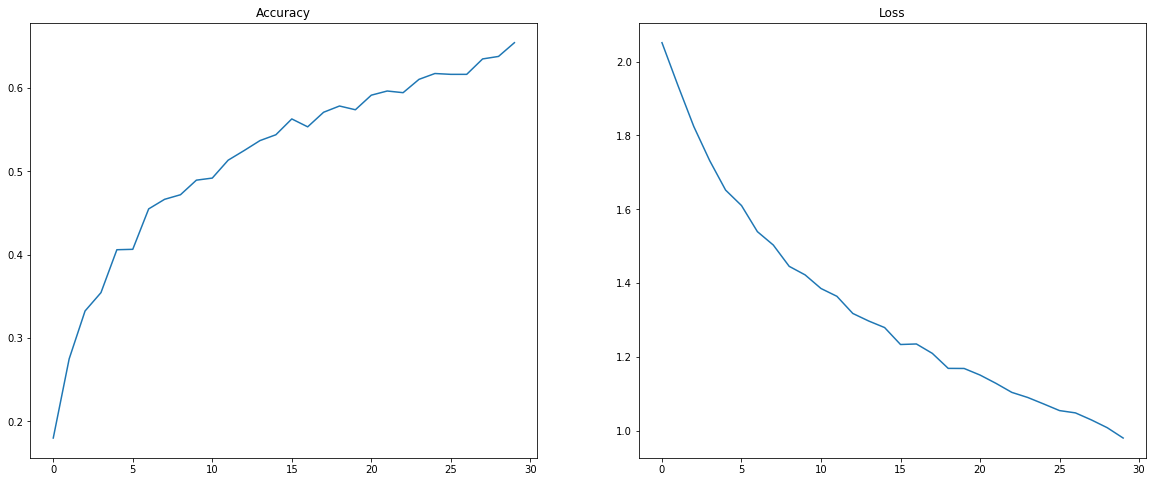

In [66]:
print_learning_curves(history)

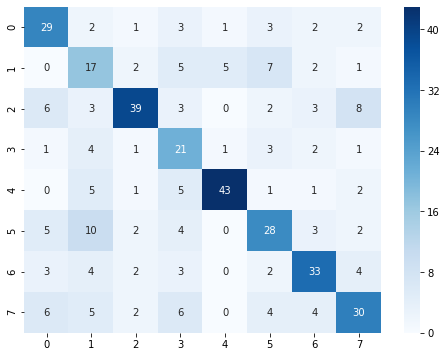

<Figure size 432x288 with 0 Axes>

In [67]:
y_pred = np.argmax(trans_model.predict(X_test), axis = 1)
show_confusion(y_pred, Y_test)

In [69]:
update_model(trans_model, MODEL_NAME_3)

Nothing to compare to, write model
Model written into json.
Weights written into file.
